### 1. 取得資料
* pandas
* read_csv
* 資料觀察

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#import dataset
df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. 資料清理
* 遺漏值處理
* 格式轉換

In [4]:
#remove the columns model will not use
df.drop(['Name', 'Ticket'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


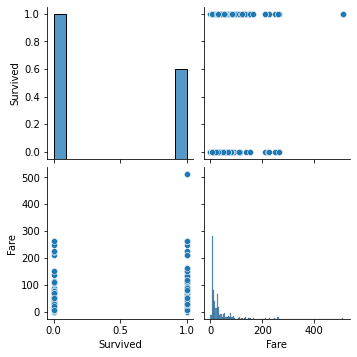

In [6]:
sns.pairplot(df[['Survived', 'Fare']], dropna=True)

* 存活者
    * 平均年齡稍低一些
    * 票價平均較高一些

In [7]:
#data observing
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [8]:
#other data observing
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
#handle missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
len(df)

891

In [13]:
df.isnull().sum() > len(df)/2

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [14]:
#we can find that cabin has more than 50% missing values
df.drop('Cabin', axis=1, inplace=True)
df.head()
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [15]:
#use mean age to fill the missing values
df['Age'] = df.groupby('Sex')['Age'].apply(lambda x: x.fillna(x.mean()))

In [16]:
df.isnull().sum() #2 missing values in Embarked

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [18]:
#find the value with the highest frequency and fill the missing values
df['Embarked'].value_counts().idxmax()
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [19]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#all missing values are filled
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
#transform categorical data
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [22]:
#remain Sex_male and drop Sex_female
df.drop('Sex_female', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


### 3. 資料切割
* 訓練資料 70%
* 測試資料 30%

In [23]:
df.corr() #correlation between variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.035543,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.080453,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.330391,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053
Age,0.035543,-0.080453,-0.330391,1.000000,-0.236920,-0.182556,0.089079,0.103236,0.031797,-0.019970,-0.015289
SibSp,-0.057527,-0.035322,0.083081,-0.236920,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.182556,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.089079,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184
Sex_male,0.042939,-0.543351,0.131900,0.103236,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.001205,0.168240,-0.243292,0.031797,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,-0.033606,0.003650,0.221009,-0.019970,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421


In [32]:
#prepare training data
X = df.drop(['Survived','Pclass'],axis=1)
Y = df['Survived']

#split data to training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### 4. 模型選擇與使用
* sklearn
* logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)

d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. 結果分析與驗證
* metrics

In [34]:
#evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
accuracy_score(Y_test, predictions)

0.7835820895522388

In [35]:
recall_score(Y_test, predictions)

0.68

In [36]:
precision_score(Y_test, predictions)

0.723404255319149

In [37]:
pd.DataFrame(confusion_matrix(Y_test, predictions), columns=['Predicted not Survived', 'Predicted Survived'], index=['Actual not Survived', 'Actual Survived'])

,Predicted not Survived,Predicted Survived
Actual not Survived,142,26
Actual Survived,32,68


In [39]:
#show passengerId and predicted result
pd.DataFrame({'PassengerId': X_test.index, 'Survived': predictions}).set_index('PassengerId')

,Survived
PassengerId,
495,0
648,0
278,0
31,1
255,1
...,...
263,0
718,0
620,0


### 6. 產生Kaggle Submission

In [57]:
#load test data
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
#find missing values
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
#fill missing values
test_df['Age'] = test_df.groupby('Sex')['Age'].apply(lambda x: x.fillna(x.mean()))
test_df['Fare'] = test_df.groupby('Sex')['Fare'].apply(lambda x: x.fillna(x.mean()))

In [60]:
#prepare test data
test_df['Sex_male'] = np.where(test_df['Sex'] == 'male', 1, 0)
test_df.drop('Sex', axis=1, inplace=True)
test_df['Embarked_C'] = np.where(test_df['Embarked'] == 'C', 1, 0)
test_df['Embarked_Q'] = np.where(test_df['Embarked'] == 'Q', 1, 0)
test_df['Embarked_S'] = np.where(test_df['Embarked'] == 'S', 1, 0)
test_df.drop('Embarked', axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,0,1


In [61]:
#drop the columns model will not use
test_df.drop(['Name', 'Ticket', 'Cabin', 'Pclass'], axis=1, inplace=True)
test_df.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,0,1


In [64]:
#predict
predictions = lr.predict(test_df)
#index = test_df['PassengerId'] and column = ['PassengerId', 'Survived']
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = predictions
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
